<a href="https://colab.research.google.com/github/PaulToronto/Howard-University-Coursera-Linear-Algebra-For-Data-Science-Specialization/blob/main/3_2_1_Applying_the_Method_of_Least_Squares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.2.1 Applying the Method of Least Squares

## The Normal Equation

$$
A = (X^{T}X)^{-1}X^{T}Y
$$

## Sum of Squares Error

$$
SSE = E^{T}E
$$

## Imports

In [1]:
import pandas as pd
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

## 3.2.1.1 Applying the Method of Least Squares

### The data

In [2]:
path = 'https://raw.githubusercontent.com/PaulToronto/'
path += 'Howard-University-Coursera-Linear-Algebra-For-Data-Science-Specialization/'
path += 'main/data/icecreamsales.csv'

ice_cream = pd.read_csv(path)

In [3]:
ice_cream

,Temperature,Sales
0,37,292
1,40,228
2,49,324
3,61,376
4,72,440
5,79,496
6,83,536
7,81,556
8,75,496
9,64,412


In [4]:
ice_cream = ice_cream.sort_values(by='Sales')
ice_cream

,Temperature,Sales
1,40,228
0,37,292
11,40,320
2,49,324
10,53,324
3,61,376
9,64,412
4,72,440
5,79,496
8,75,496


In [5]:
X = sym.Matrix(ice_cream['Temperature'])
X = X.col_insert(0, sym.Matrix([1] * len(X)))
X

Matrix([
[1, 40],
[1, 37],
[1, 40],
[1, 49],
[1, 53],
[1, 61],
[1, 64],
[1, 72],
[1, 79],
[1, 75],
[1, 83],
[1, 81]])

In [6]:
y = sym.Matrix(ice_cream['Sales'])
y

Matrix([
[228],
[292],
[320],
[324],
[324],
[376],
[412],
[440],
[496],
[496],
[536],
[556]])

### Applying the Normal Equation

In [7]:
A = (X.T @ X).inv() @ X.T @ y
A

Matrix([
[341356/9599],
[ 57192/9599]])

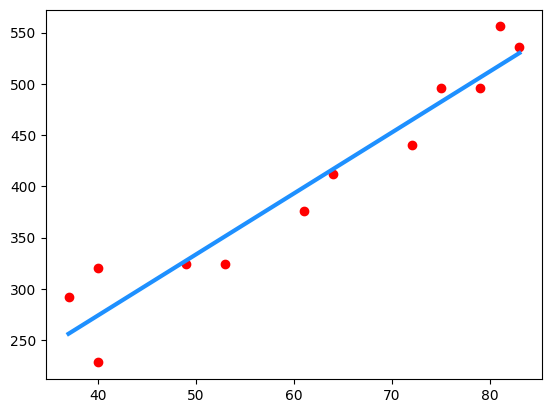

In [8]:
plt.scatter(ice_cream['Temperature'], ice_cream['Sales'], c='red')

# regression line
x = np.linspace(ice_cream['Temperature'].min(), ice_cream['Temperature'].max(), len(ice_cream))
y_pred = A[0] + A[1] * x
plt.plot(x, y_pred, color='dodgerblue', linewidth=3)

plt.show();

In [9]:
A.evalf()

Matrix([
[35.5616210021877],
[5.95812063756641]])

In [10]:
predict_sales = lambda temp: A[0] + A[1] * temp

In [11]:
predict_sales(89).evalf()

565.834357745598

In [12]:
y_pred = sym.Matrix(A[0] + A[1] * ice_cream['Temperature'])
y = sym.Matrix(ice_cream['Sales'])
E = y - y_pred
E

Matrix([
[-440464/9599],
[   11912/331],
[ 442644/9599],
[ -33688/9599],
[-262456/9599],
[-220844/9599],
[ -46856/9599],
[-235620/9599],
[ -98420/9599],
[ 130348/9599],
[  56772/9599],
[ 363136/9599]])

In [13]:
SSE = E.T @ E
SSE

Matrix([[88295328/9599]])

In [14]:
sym.sqrt(SSE.evalf()[0])

95.9082278297013

## 3.2.1.2 Minimizing the Error

### What is the error?

The error is the difference between the observed value and the predicted value, where the predicted value is the value obtained using the regression model.

### Ways of Minimizing the Error

- Change the model
- Feature engineering: Determine which independent variables will help you determine a good model
- Data cleaning: Linear regression can be sensitive to outliers. It may be beneficial to remove outliers.

### Outlier

https://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm

An **outlier** is an observation taht lies an abnormal distance from other values in a random sample from a population. This definition leaves it up to the analyst to decided what will be considered abnormal.